In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from statistics import mean

from analysis_utils import get_speckle_stats_dnn_and_das, get_df

In [2]:
identifier = '*'
df = get_df(identifier)

# Load data from all three experiments
# 1. Simulated Anechoic cysts
scan_battery_name_cyst = 'target_anechoic_cyst_5mm'
target_suffix_cyst = '_SNR_10dB'
target_num_list_cyst = range(1, 6)
speckle_stats_dnn_cyst, speckle_stats_das_cyst = get_speckle_stats_dnn_and_das(scan_battery_name_cyst, target_num_list_cyst, target_suffix_cyst, identifier)


# 2. Phantom cyst
scan_battery_name_phantom = 'target_phantom_anechoic_cyst_2p5mm'
target_suffix_phantom = ''
target_num_list_phantom = range(1, 6)
speckle_stats_dnn_phantom, speckle_stats_das_phantom = get_speckle_stats_dnn_and_das(scan_battery_name_phantom, target_num_list_phantom, target_suffix_phantom, identifier)


# 3. In vivo
scan_battery_name_in_vivo = 'target_in_vivo'
target_suffix_in_vivo = ''
target_num_list_in_vivo = [17, 19]
speckle_stats_dnn_in_vivo, speckle_stats_das_in_vivo = get_speckle_stats_dnn_and_das(scan_battery_name_in_vivo, target_num_list_in_vivo, target_suffix_in_vivo, identifier)


/Users/zhanwenchen/Documents/projects/beam_nn/notebooks/analysis_utils.py:39: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, df_single])
/Users/zhanwenchen/Documents/projects/beam_nn/notebooks/analysis_utils.py:83: UserWarning: analysis_utils: Unable to find ../DNNs/../DNNs/20180705164352_16_evaluated/scan_batteries/target_in_vivo/target_19/speckle_stats_dnn.txt for target_in_vivo
  warnings.warn('analysis_utils: Unable to find ' + filename_dnn + ' for ' + scan_battery_name)
/Users/zhanwenchen/Documents/projects/beam_nn/notebooks/analysis_utils.py:83: UserWarning: analysis_utils: Unable to find ../DNNs/../DNNs/20180705164352_6_evaluated/scan_batteries/target_in_vivo/target_19/speckle_stats_dnn.txt for target_in_vivo
  warnings.warn('analysis_utils: Unable

In [3]:
speckle_stats_dnn_cyst, speckle_stats_das_cyst = get_speckle_stats_dnn_and_das(scan_battery_name_cyst, target_num_list_cyst, target_suffix_cyst, identifier)


In [4]:
df

,batch_norm,batch_size,conv1_dropout,conv1_kernel_size,conv1_num_kernels,conv1_stride,conv2_dropout,conv2_kernel_size,conv2_num_kernels,conv2_stride,...,pool2_kernel_size,pool2_stride,pooling_method,save_dir,save_initial,use_pooling,weight_decay,loss_val_k_3,loss_val_k_4,loss_val_k_5
index,,,,,,,,,,,,,,,,,,,,,
0,1,32,0.0,6,36,1,0.296373,5,4,1,...,2,2,max,DNNs/20180709112043_16/k_4,0,0,0,0.030513,0.030799,0.034052
1,1,32,0.0,9,39,1,0.780615,9,28,1,...,2,2,max,DNNs/20180706214952_40/k_4,0,0,0,0.141130,0.139224,0.140008
2,1,32,0.0,6,16,1,0.928861,9,16,1,...,2,2,max,DNNs/20180709112043_23/k_4,0,0,0,0.109518,0.104856,0.112715
3,1,32,0.0,7,37,1,0.175443,6,13,1,...,2,2,max,DNNs/20180706214952_6/k_4,0,0,0,0.077236,0.066101,0.073490
4,1,32,0.0,30,26,1,0.977452,19,22,1,...,2,2,max,DNNs/20180718164411_16_created/k_4,0,0,0,0.142446,0.140932,0.141448
5,1,32,0.0,9,24,1,0.429436,7,26,1,...,2,2,max,DNNs/20180709112043_37/k_4,0,0,0,0.011818,0.009830,0.010868
6,1,32,0.0,6,26,1,0.437953,9,2,1,...,2,2,max,DNNs/20180709112043_2/k_4,0,0,0,0.073703,0.106554,0.078116
7,1,32,0.0,7,18,1,0.553343,2,4,1,...,2,2,max,DNNs/20180706214952_23/k_4,0,0,0,0.069917,0.066655,0.072668
8,1,32,0.0,9,40,1,0.731129,7,13,1,...,2,2,max,DNNs/20180706214952_37/k_4,0,0,0,0.054886,0.055274,0.077333


# CNR: Simulation vs Phantom

<IPython.core.display.Javascript object>


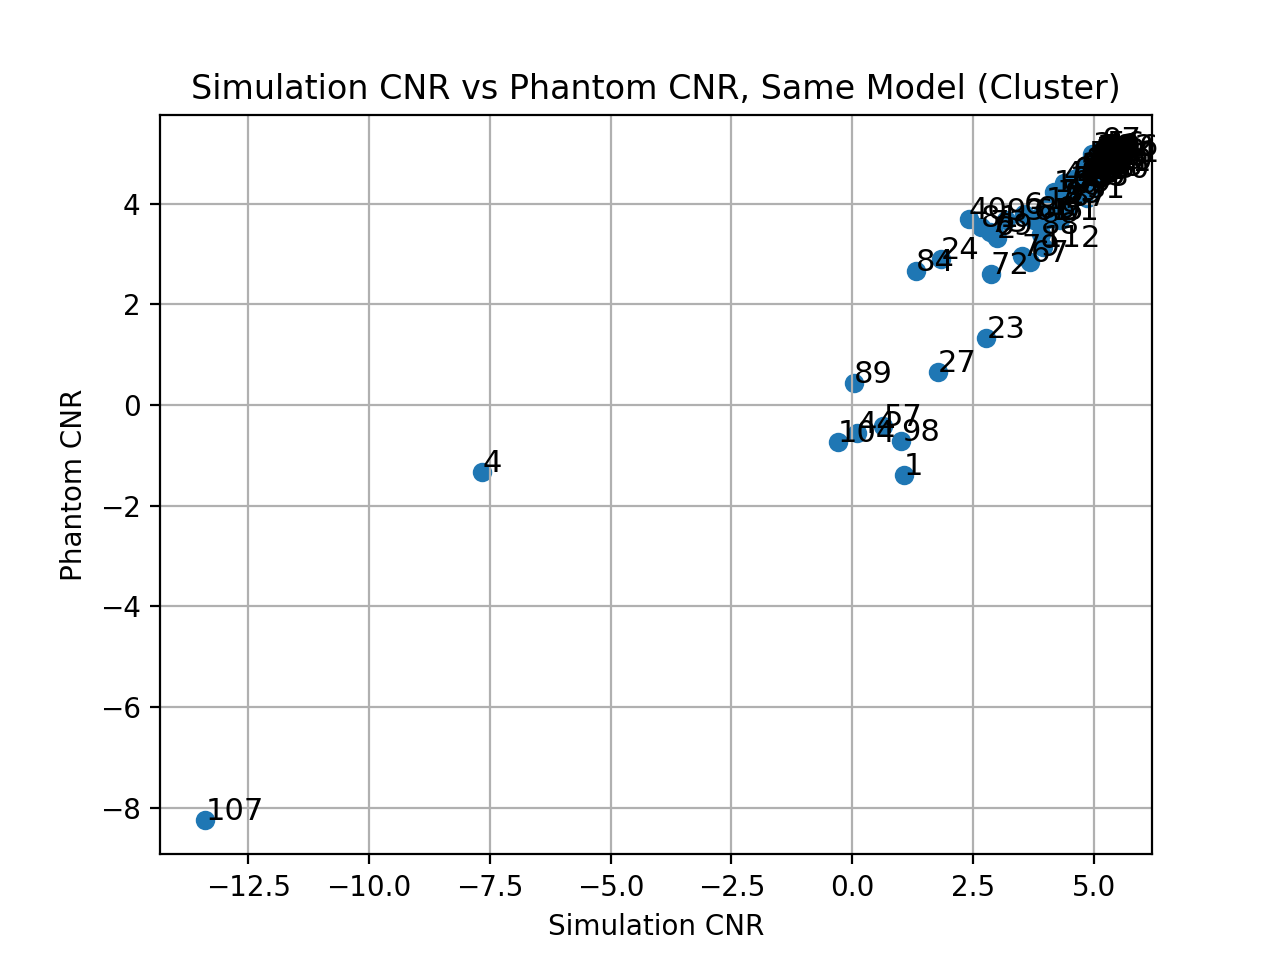

In [5]:
m = 1 # m=1 is CNR

is_labeling_points = True

x = speckle_stats_dnn_cyst[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_phantom[:, m, :].mean(axis=-1)
fig, ax = plt.subplots()
ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i], y[i]), size=11)


ax.grid()
ax.set_title('Simulation CNR vs Phantom CNR, Same Model (Cluster)')
ax.set_xlabel('Simulation CNR')
ax.set_ylabel('Phantom CNR')
plt.show()

# CNR: Simulation vs In vivo

<IPython.core.display.Javascript object>


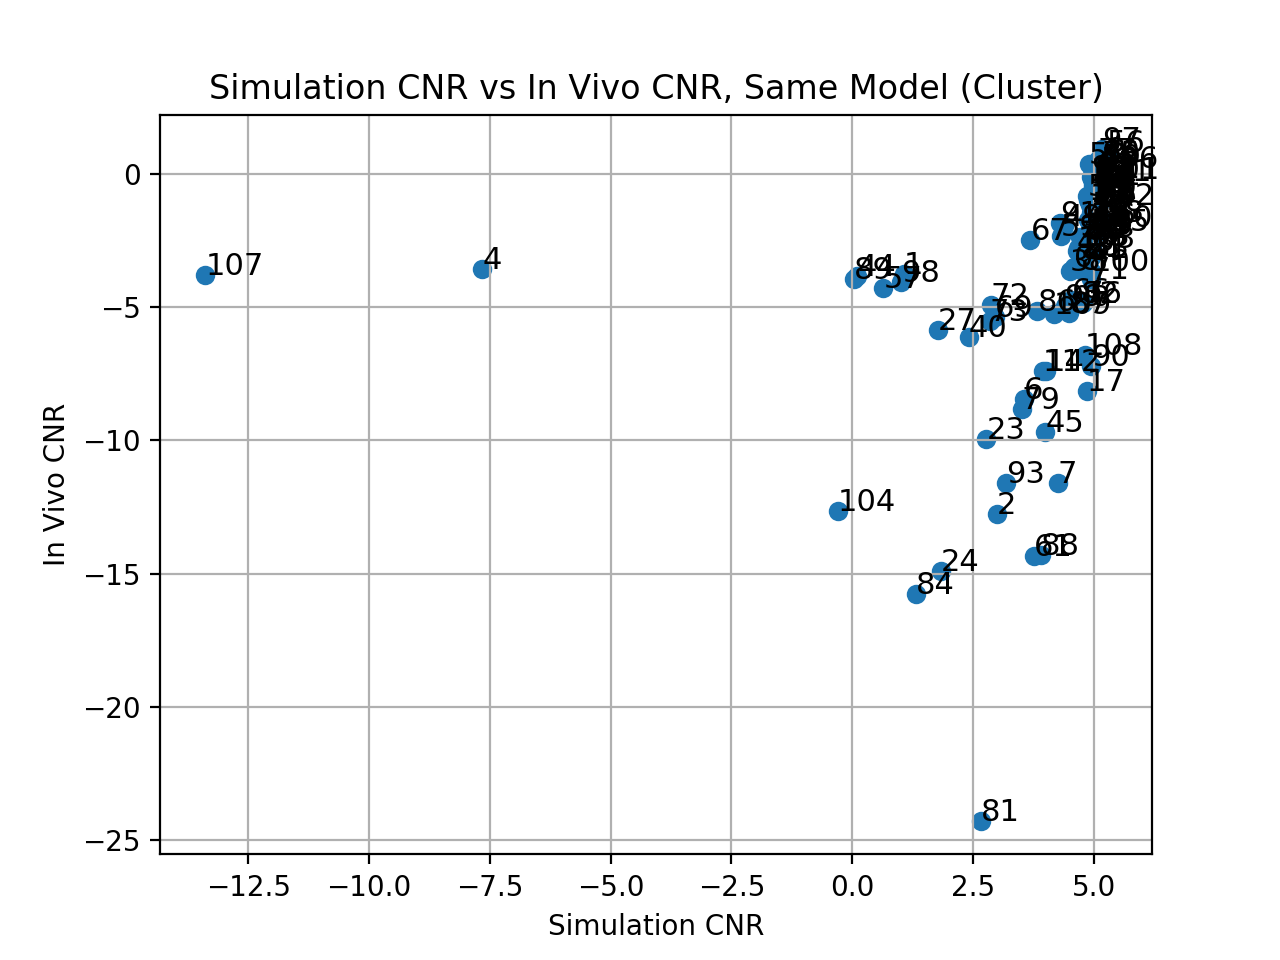

In [6]:
# Simulation vs In vivo

fig, ax = plt.subplots()
x = speckle_stats_dnn_cyst[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_in_vivo[:, m, :].mean(axis=-1)

ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i],y[i]), size=11)
    
    
ax.grid()
ax.set_title('Simulation CNR vs In Vivo CNR, Same Model (Cluster)')
ax.set_xlabel('Simulation CNR')
ax.set_ylabel('In Vivo CNR')
plt.show()

# Phantom vs In vivo

<IPython.core.display.Javascript object>


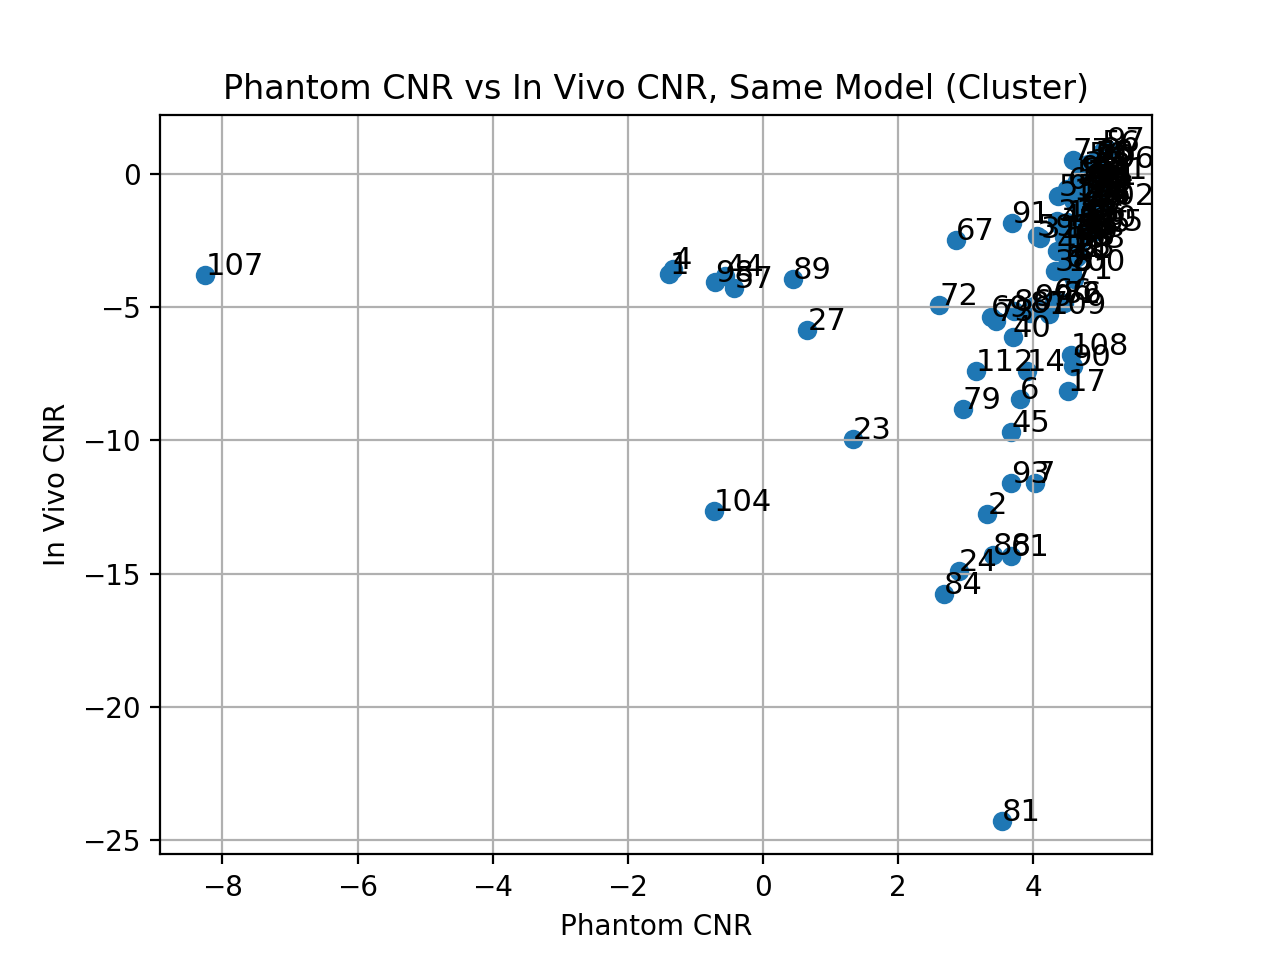

In [7]:
# # Simulation vs In vivo

fig, ax = plt.subplots()

x = speckle_stats_dnn_phantom[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_in_vivo[:, m, :].mean(axis=-1)

ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i],y[i]), size=11)
    
ax.grid()
ax.set_title('Phantom CNR vs In Vivo CNR, Same Model (Cluster)')
ax.set_xlabel('Phantom CNR')
ax.set_ylabel('In Vivo CNR')
plt.show()

# CNR vs Hyperparams

In [8]:
# # Simulated Cyst CNR vs Model Params

hyperparams = [ \
 'batch_norm',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
 'conv1_dropout',
               
 'pool1_kernel_size',
 'pool1_stride',
               
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
               
 'pool2_kernel_size',
 'pool2_stride',
               
 'fcs_hidden_size',
 'fcs_dropout',
 'fcs_num_hidden_layers',
               
               
#  'data_is_target',
 'data_noise_gaussian',
#  'data_train',
#  'data_val',
#  'k',
#  'patience',
#  'save_initial',
#  'weight_decay',
#  'batch_size',
 'loss_val_k_3',
 'loss_val_k_4',
 'loss_val_k_5',
          
 'learning_rate',
 'optimizer',
 'momentum',
]



# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

mean_cnr_cyst = speckle_stats_dnn_cyst[:, 1, :].mean(axis=-1)
df['mean_cnr_cyst'] = mean_cnr_cyst

mean_cnr_phantom = speckle_stats_dnn_phantom[:, 1, :].mean(axis=-1)
df['mean_cnr_phantom'] = mean_cnr_phantom

mean_cnr_in_vivo = speckle_stats_dnn_in_vivo[:, 1, :].mean(axis=-1)
df['mean_cnr_in_vivo'] = mean_cnr_in_vivo


In [9]:
max_cnr = df['mean_cnr_cyst'].idxmax()
print(max_cnr)
max_row = df[max_cnr:max_cnr+1]
max_row.index = [0]

56


In [10]:
def plot_cnr_hyperparameters(df, column_of_interest, ylim=(0, 6), plot_method='scatter'):
    number_of_subplots = len(hyperparams)
    ncols = 4
    nrows = number_of_subplots // ncols 
    nrows += number_of_subplots % ncols

    # Create a Position index
    position = range(1, number_of_subplots + 1)

    fig = plt.figure(1, figsize=(20, 40))

    for i, column in enumerate(df[hyperparams]):
        ax = fig.add_subplot(nrows, ncols, position[i])
        if plot_method == 'scatter':
            ax.scatter(df_dropout[column], df[column_of_interest], color='blue')
#             ax.scatter(df_no_dropout[column], df_no_dropout[column_of_interest], color='red')
        else:
            possible_column_values = df_dropout_and_no_dropout[column].unique()
            print('df_dropout[%s] =' % column, df_dropout[column])
            print('df_no_dropout[%s] =' % column, df_no_dropout[column])
#             ax.bar(['with dropout', 'without dropout'], [df_dropout[column][0], df_no_dropout[column][0]])
            ax.bar(possible_column_values, )
        ax.set_ylabel('cnr')
        ax.set_xlabel(column)
        if ylim: ax.set_ylim(*ylim)

    plt.show()

# Picking High CNR, Low Speckle SNR Models - Simulation

<IPython.core.display.Javascript object>


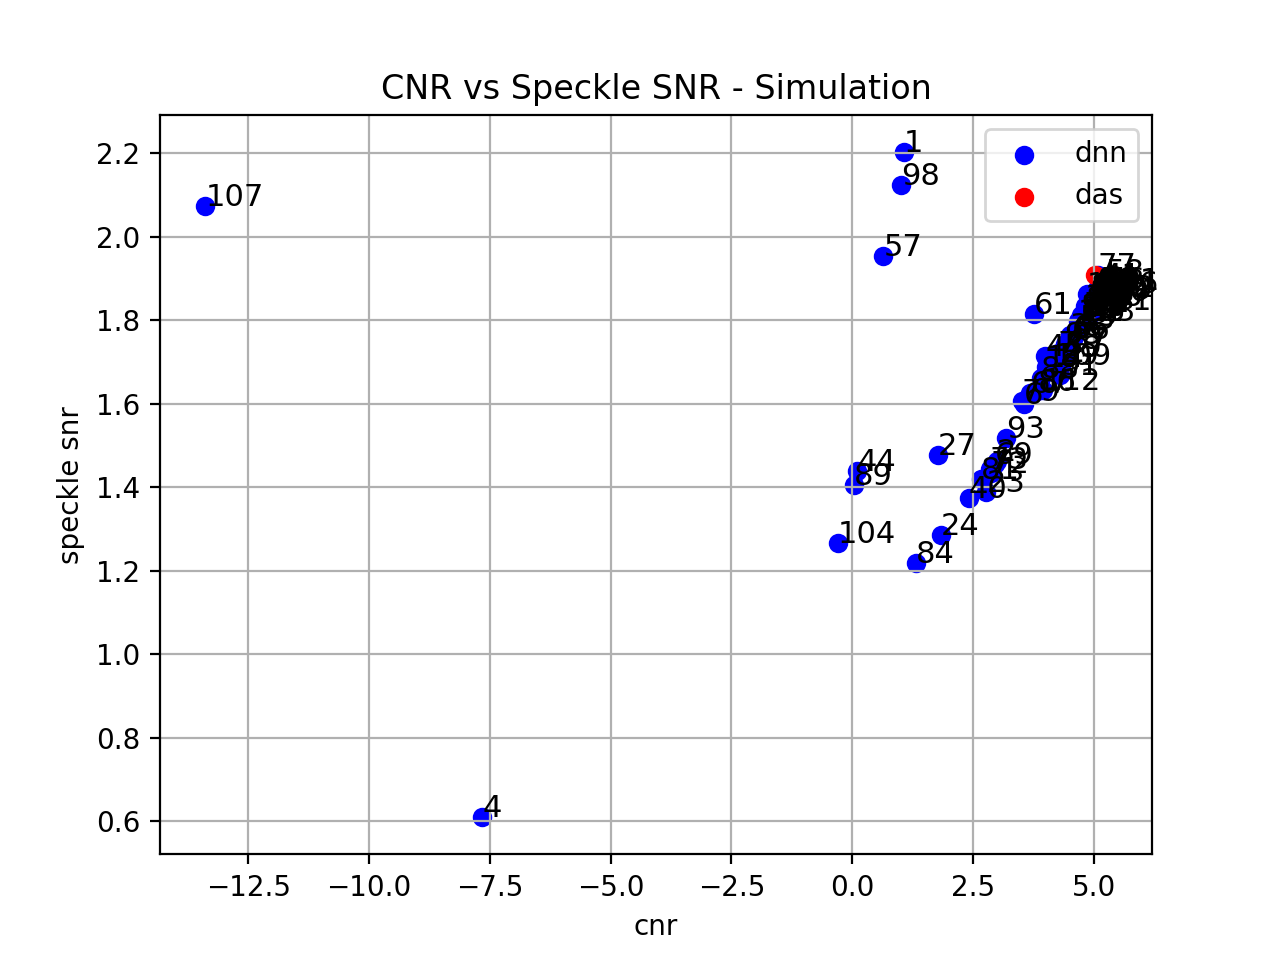

In [11]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_simulation = mean([5.09, 4.9138, 5.148, 4.8877, 5.0831])
das_avg_speckle_snr_simulation = mean([1.9281, 1.8777, 1.9231, 1.8922, 1.9186])

is_labeling_points = True

cnr_simulation = speckle_stats_dnn_cyst[:, cnr, :].mean(axis=-1)
speckle_snr_simulation = speckle_stats_dnn_cyst[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_simulation, speckle_snr_simulation, color='blue', label='dnn')
ax.scatter(das_avg_cnr_simulation, das_avg_speckle_snr_simulation, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_simulation))):
        ax.annotate(annotation, (cnr_simulation[i], speckle_snr_simulation[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - Simulation')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
plt.show()

# Picking High CNR, Low Speckle SNR Models - Phantom

<IPython.core.display.Javascript object>


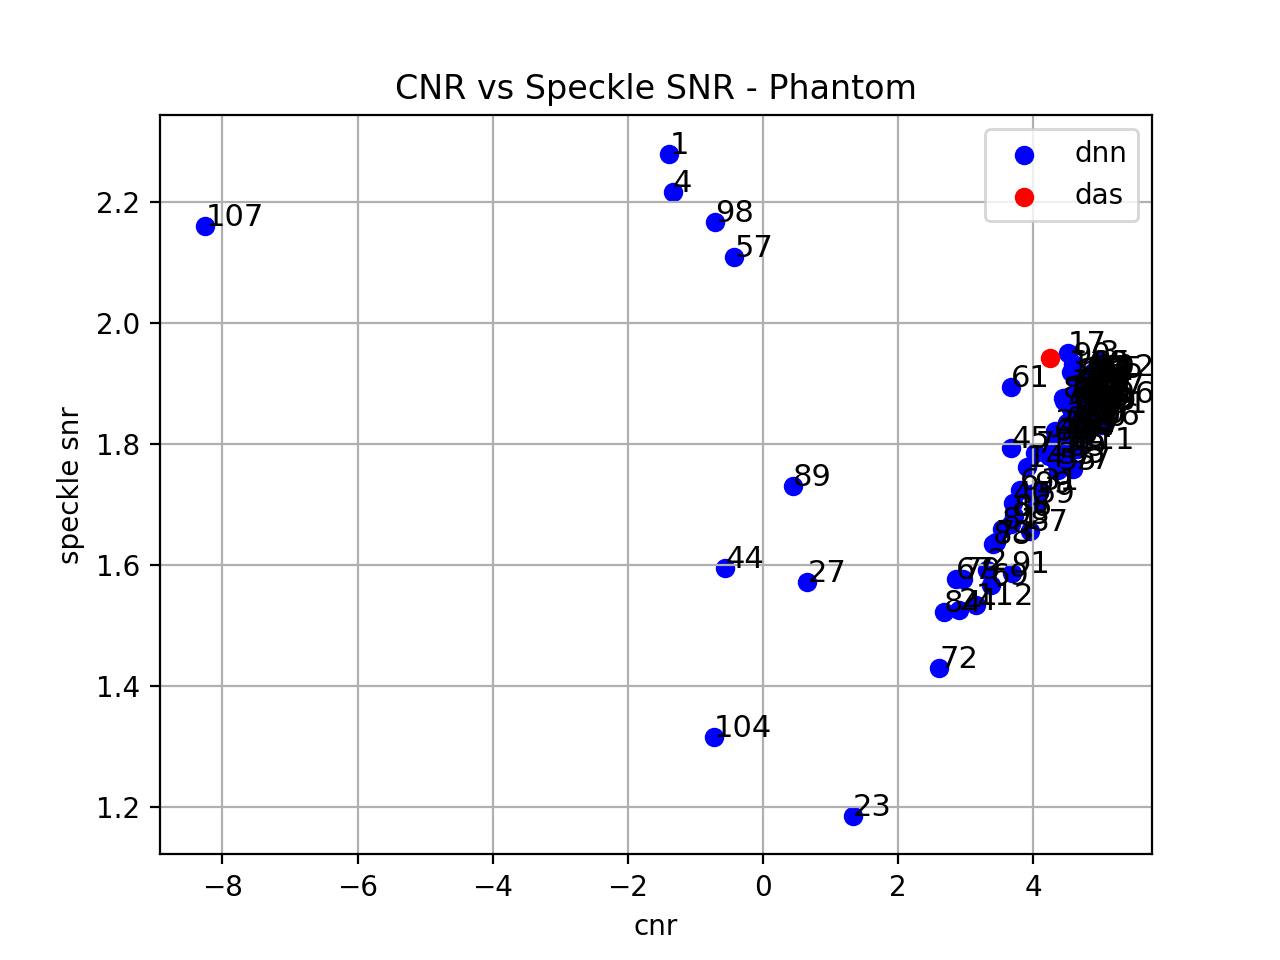

In [12]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_phantom = mean([4.3994, 3.7869, 4.5012, 4.7083, 3.804])
das_avg_speckle_snr_phantom = mean([1.9298, 1.8478, 1.9997, 2.0478, 1.8886])

is_labeling_points = True

cnr_phantom = speckle_stats_dnn_phantom[:, cnr, :].mean(axis=-1)
speckle_snr_phantom = speckle_stats_dnn_phantom[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_phantom, speckle_snr_phantom, color='blue', label='dnn')
ax.scatter(das_avg_cnr_phantom, das_avg_speckle_snr_phantom, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_phantom))):
        ax.annotate(annotation, (cnr_phantom[i], speckle_snr_phantom[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - Phantom')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
plt.show()

# Picking High CNR, Low Speckle SNR Models - In Vivo

<IPython.core.display.Javascript object>


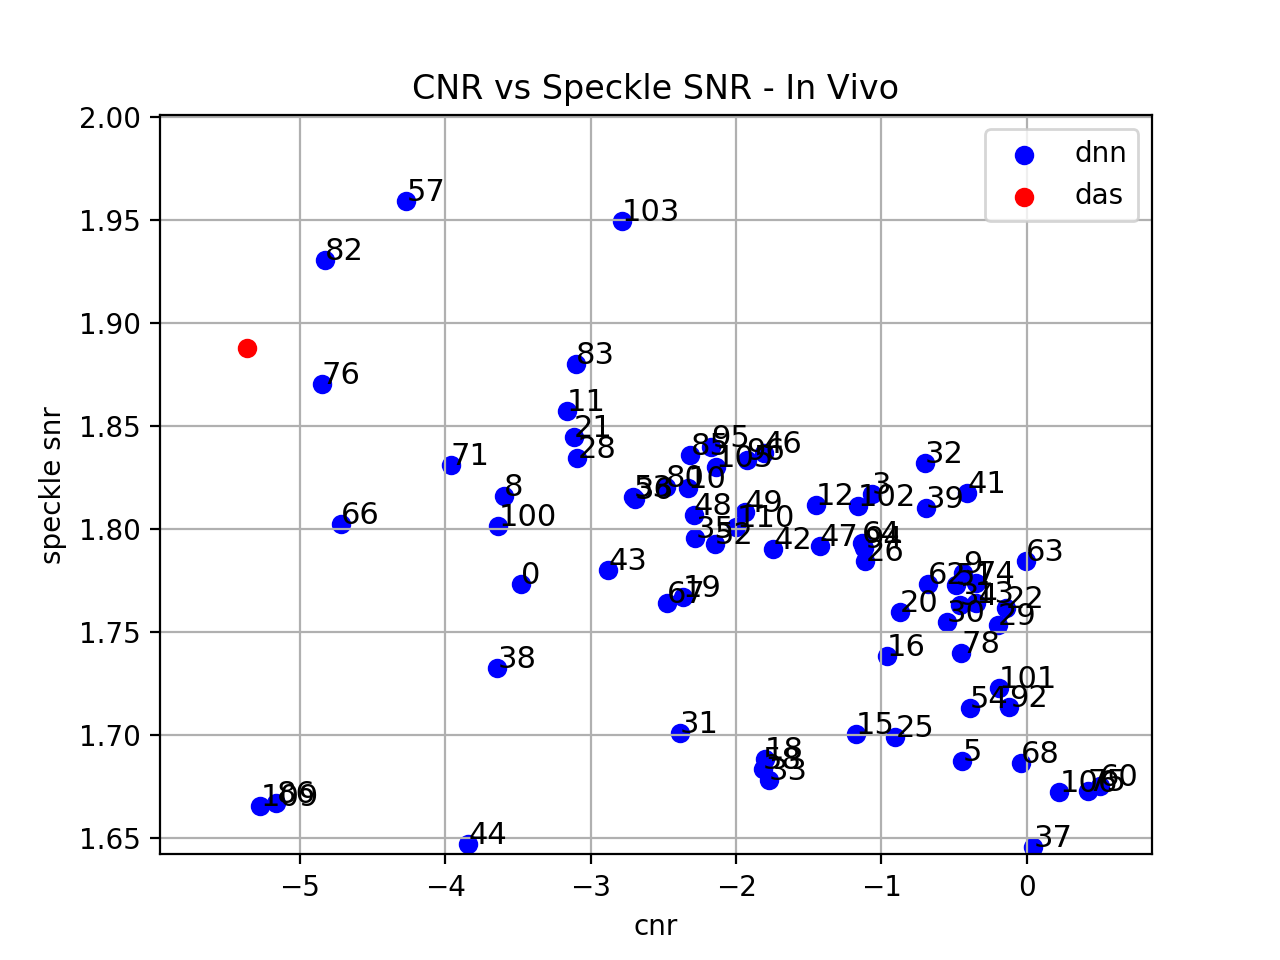

In [13]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_in_vivo = mean([-14.982, 4.2585])
das_avg_speckle_snr_in_vivo = mean([1.8672, 1.9078])

is_labeling_points = True

cnr_in_vivo = speckle_stats_dnn_in_vivo[:, cnr, :].mean(axis=-1)
speckle_snr_in_vivo = speckle_stats_dnn_in_vivo[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_in_vivo, speckle_snr_in_vivo, color='blue', label='dnn')
ax.scatter(das_avg_cnr_in_vivo, das_avg_speckle_snr_in_vivo, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_in_vivo))):
        ax.annotate(annotation, (cnr_in_vivo[i], speckle_snr_in_vivo[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - In Vivo')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
plt.show()

# Picking Models With Better CNR, Lower Speckle SNR than DAS

In [14]:
speckle_snr_tolerance = 0.1

all_three = [index for index, (s_cnr, s_speckle, p_cnr, p_speckle, i_cnr, i_speckle) in enumerate(zip(cnr_simulation, speckle_snr_simulation, cnr_phantom, speckle_snr_phantom, cnr_in_vivo, speckle_snr_in_vivo))
    if s_cnr > das_avg_cnr_simulation and s_speckle > das_avg_speckle_snr_simulation - speckle_snr_tolerance and s_speckle < das_avg_speckle_snr_simulation + speckle_snr_tolerance
        and p_cnr > das_avg_cnr_phantom and p_speckle > das_avg_speckle_snr_phantom - speckle_snr_tolerance and p_speckle < das_avg_speckle_snr_phantom + speckle_snr_tolerance
        and i_cnr > das_avg_cnr_in_vivo and i_speckle > das_avg_speckle_snr_in_vivo - speckle_snr_tolerance and i_speckle < das_avg_speckle_snr_in_vivo + speckle_snr_tolerance
]

In [15]:
df.iloc[all_three]['name']

index
32     20180706214952_17_evaluated
39     20180706131924_47_evaluated
41     20180705164352_12_evaluated
47     20180706214952_19_evaluated
64     20180706214952_44_evaluated
94     20180709112043_18_evaluated
96     20180706214952_45_evaluated
102     20180709112043_7_evaluated
Name: name, dtype: object

In [16]:
df.iloc[[56]]['name']

index
56    20180718164411_5_evaluated
Name: name, dtype: object

In [17]:
df.iloc[[41]]['name'] # Use this for in vivo

index
41    20180705164352_12_evaluated
Name: name, dtype: object

In [18]:
df.iloc[[2]]['name']

index
2    20180709112043_23_evaluated
Name: name, dtype: object

In [19]:
df.iloc[[39]]['name']

index
39    20180706131924_47_evaluated
Name: name, dtype: object

In [20]:
cnr_phantom[2]

3.31926